# 1. Housekeeping

In [6]:
import ciao_contrib.runtool
from ciao_contrib.runtool import *
import pandas as pd
import numpy as np
from numpy import load
import astropy 
from astropy.table import Table
from astropy.io import fits
import os
import glob
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import pickle

# List Folders Function
def list_folders(path):
    return [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    
# Specify path
path = '/Users/steven/Library/CloudStorage/OneDrive-ImperialCollegeLondon/01-27-2023-FYP-CfA/4-Code-Data/Chandra-Data/'
folders = list_folders(path)
folder_list = []
for folder in folders:
    folder_list.append(folder)

# Select Set
set_widget = widgets.Dropdown(options=folder_list[:],value=folder_list[1],description='Set :',disabled=False); set_widget

Dropdown(description='Set :', index=1, options=('Set-2', 'Set-Y', 'Set-5', 'Set-4', 'Set-3', 'Set-6', 'Set-1')…

# 2. Data Representation

Load Data

In [7]:
# Set ID
set_id = set_widget.value.split("-")[1]
# Load data
df_inputs = pd.read_csv(f'{path}Set-{set_id}/inputs-{set_id}.csv')
df_labels = pd.read_csv(f'{path}Set-{set_id}/labels-{set_id}.csv')
df_inputs.head()

,obsid,region_id,time,energy,chipx,chipy,obsreg_id
0,12251,17,3.990061e+08,4315.56350,786,147,12251_17
1,12251,17,3.990065e+08,2116.98780,816,136,12251_17
2,12251,17,3.990066e+08,4914.25050,802,118,12251_17
3,12251,17,3.990068e+08,941.78253,782,127,12251_17
4,12251,17,3.990069e+08,1954.35330,779,123,12251_17


In [19]:
# Set number of bins and bounds of dt axis
nbins_E = 9
nbins_dt = 14
dt_axis_max = 4.5
dt_axis_min = -3.5

2D Histogram Representations

In [15]:
print(hist[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.343548   0.         0.         0.
  0.         0.         0.        ]
 [0.343548   0.343548   0.         0.         0.         0.
  0.         0.         0.        ]
 [0.343548   0.343548   0.68709601 0.68709601 0.         0.
  0.         0.         0.        ]
 [1.03064401 0.343548   1.37419202 1.37419202 0.343548   0.
  0.         0.343548   0.        ]
 [0.68709601 0.343548   1.03064401 0.343

In [14]:
print(np.log10(hist[0]+0.01))

[[-2.         -2.         -2.         -2.         -2.         -2.
  -2.         -2.         -2.        ]
 [-2.         -2.         -2.         -2.         -2.         -2.
  -2.         -2.         -2.        ]
 [-2.         -2.         -2.         -2.         -2.         -2.
  -2.         -2.         -2.        ]
 [-2.         -2.         -2.         -2.         -2.         -2.
  -2.         -2.         -2.        ]
 [-2.         -2.         -2.         -2.         -2.         -2.
  -2.         -2.         -2.        ]
 [-2.         -2.         -2.         -2.         -2.         -2.
  -2.         -2.         -2.        ]
 [-2.         -2.         -0.45155161 -2.         -2.         -2.
  -2.         -2.         -2.        ]
 [-0.45155161 -0.45155161 -2.         -2.         -2.         -2.
  -2.         -2.         -2.        ]
 [-0.45155161 -0.45155161 -0.1567074  -0.1567074  -2.         -2.
  -2.         -2.         -2.        ]
 [ 0.01730219 -0.45155161  0.14119634  0.14119634 -0.45

In [ ]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
# Initialise features, labels and ids lists
x_features = []
y_labels = []
id_pass = []
unique_ids = df_inputs["obsreg_id"].unique()

# Loop over all eventfiles
for id in unique_ids[:]:
    # Filter to eventfile and labels according to unique identifier
    df = df_inputs[df_inputs['obsreg_id']==id]
    dfy = df_labels[df_labels['obsreg_id'] == id]
    # Add delta_time column
    df["delta_time"] = df['time'].diff()
    # Remove first row as delta_time = nan
    df = df[df["delta_time"].notna()]
    # Add a constant value "pseudo-count" 0.1 to delta_time = 0 
    df["delta_time"] = df["delta_time"].apply(lambda dt: np.where(dt == 0, dt + 0.1, dt))
    # Eventfile length, duration and energy range
    N = len(df) 
    T = max(df["time"])-min(df["time"])
    E = max(df["energy"])-min(df["energy"])
    # Add dt column
    df["dt"] = np.log10(100 * N * df["delta_time"]/T)
    # Add E column
    df["E"] = np.log10(df["energy"])
    # Create histogram representation
    fig, ax = plt.subplots(figsize=(8,8))
    hist = plt.hist2d(df["dt"],df["E"],range = [[dt_axis_min, dt_axis_max],[np.log10(500.), np.log10(7000.)]],bins=(nbins_dt,nbins_E),norm=LogNorm(),density=True,cmap = 'plasma_r')
    # Create features and labels 
    #x = np.log10(0.01+hist[0]) # Apply log to smaller counts more visible and add "pseudo-count" = 0.01 NOT NECESSARY
    x = hist[0]
    y = dfy[['cnts_aper_b','cnts_aperbkg_b','src_cnts_aper_b','flux_aper_b','hard_hm','hard_hs','hard_ms','var_prob_b','var_prob_h','var_prob_m',	'var_prob_s']].to_numpy()
    # Append features, labels and ids lists
    x_features.append(x)
    y_labels.append(y)
    id_pass.append(id)

# Concatenate labels into a matrix for easier use
y_labels = np.concatenate(y_labels)


In [ ]:
# Save arrays
with open(f'{path}Set-{set_id}/x_features-{set_id}.pickle', "wb") as file:
    pickle.dump(x_features, file)
with open(f'{path}Set-{set_id}/y_labels-{set_id}.pickle', "wb") as file:
    pickle.dump(y_labels, file)
with open(f'{path}Set-{set_id}/id_pass-{set_id}.pickle', "wb") as file:
    pickle.dump(id_pass, file)

3D Histogram Representation

In [30]:
print(H)

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0

/var/folders/pr/pzfn3sxs66jfxwx55jdxqrd00000gn/T/ipykernel_3328/3406802237.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delta_time"] = df['time'].diff()


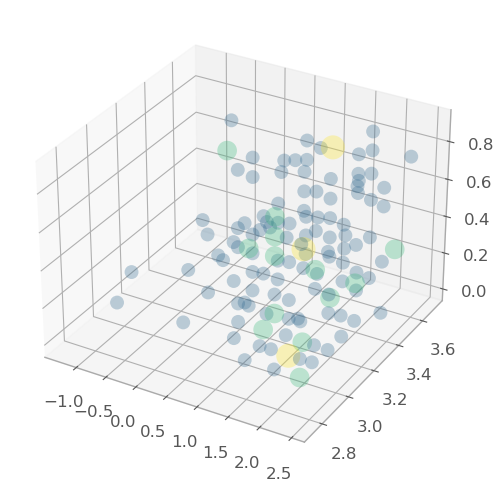

/var/folders/pr/pzfn3sxs66jfxwx55jdxqrd00000gn/T/ipykernel_3328/3406802237.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delta_time"] = df['time'].diff()


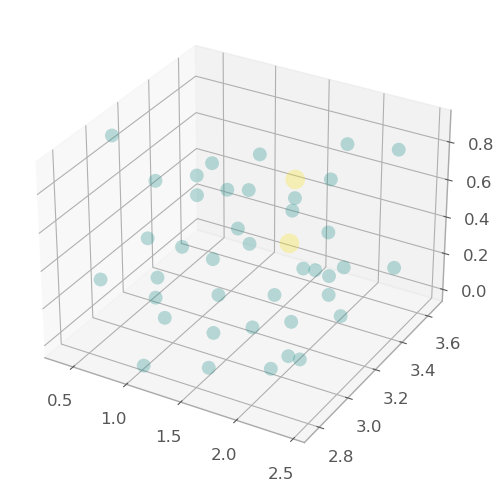

/var/folders/pr/pzfn3sxs66jfxwx55jdxqrd00000gn/T/ipykernel_3328/3406802237.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delta_time"] = df['time'].diff()


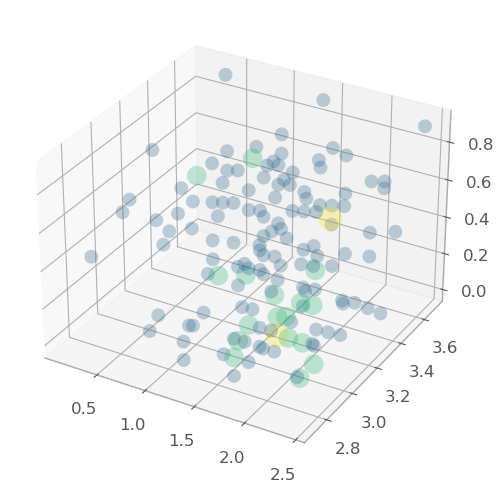

/var/folders/pr/pzfn3sxs66jfxwx55jdxqrd00000gn/T/ipykernel_3328/3406802237.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delta_time"] = df['time'].diff()


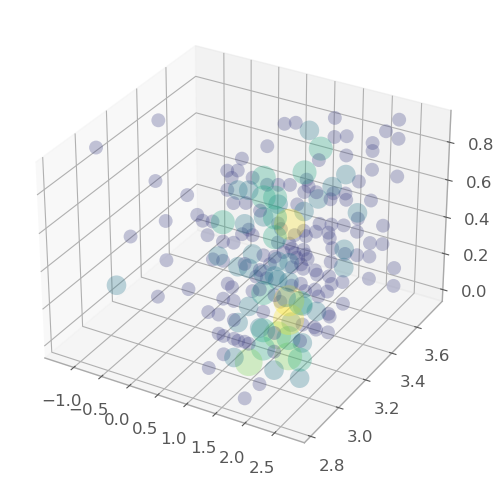

/var/folders/pr/pzfn3sxs66jfxwx55jdxqrd00000gn/T/ipykernel_3328/3406802237.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delta_time"] = df['time'].diff()


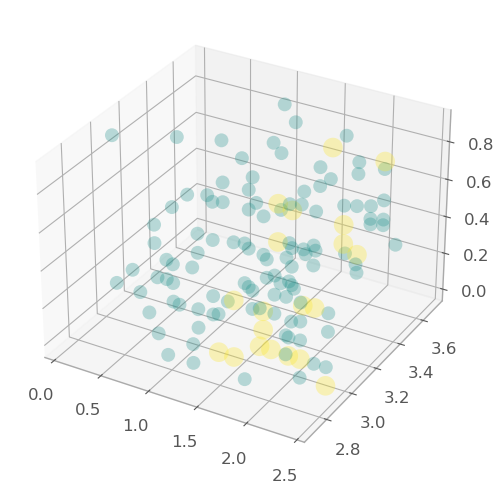

In [36]:
# Loop over all eventfiles
for id in unique_ids[:5]:
    # Filter to eventfile and labels according to unique identifier
    df = df_inputs[df_inputs['obsreg_id']==id]
    dfy = df_labels[df_labels['obsreg_id'] == id]
    # Add delta_time column
    df["delta_time"] = df['time'].diff()
    # Remove first row as delta_time = nan
    df = df[df["delta_time"].notna()]
    # Add a constant value "pseudo-count" 0.1 to delta_time = 0 
    df["delta_time"] = df["delta_time"].apply(lambda dt: np.where(dt == 0, dt + 0.1, dt))
    # Eventfile length, duration and energy range
    N = len(df) 
    T = max(df["time"])-min(df["time"])
    E = max(df["energy"])-min(df["energy"])
    # Add dt column
    df["dt"] = np.log10(100 * N * df["delta_time"]/T)
    # Add E column
    df["E"] = np.log10(df["energy"])
    # Add t column
    df["t"] = (df["time"]-min(df["time"]))/T
    
    # Assuming your 3D data is stored in a NumPy array called 'data'
    # and has three columns representing x, y, and z coordinates
    dt = df["dt"]
    E = df["E"]
    t = df["t"]

    # Define the number of bins for each dimension
    xbins = 10
    ybins = 10
    zbins = 10

    # Compute the 3D histogram using numpy.histogramdd()
    H, edges = np.histogramdd((dt, E, t), bins=(xbins, ybins, zbins))

    # Create a 3D scatter plot of the original data points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(dt, E, t, s=1, c=E, cmap='viridis', alpha=0.5)

    # Create a 3D histogram plot using matplotlib.pyplot.scatter()
    x, y, z = np.meshgrid(edges[0][:-1], edges[1][:-1], edges[2][:-1], indexing='ij')
    x = np.ravel(x)
    y = np.ravel(y)
    z = np.ravel(z)
    h = np.ravel(H)

    ax.scatter(x, y, z, s=h*100, alpha=0.3, edgecolors='none', c=h, cmap='viridis')

    plt.show()